# Task 1
1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset.
- small decision tree.
- deep decision tree.
- random forest on small trees.
- random forest on deep trees.
2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;
3. Plot precision-recall and ROC curves for your models.
4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.


In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, log_loss, precision_score, recall_score, plot_roc_curve, plot_precision_recall_curve, roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier



In [2]:
#loading data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# load the bioresponse data as data
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Task #1/bioresponse.csv")
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [4]:
# to check for any errors in labeling
data['Activity'].value_counts(normalize=True)

1    0.542255
0    0.457745
Name: Activity, dtype: float64

In [5]:
#Divide the data into independent variables and labels.
X=data.iloc[:, 1:]
y=data[['Activity']]

In [6]:
#Data is divided for training and testing, here 80% of data is used for training and 20% is used for testing the accurecy.
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2 , random_state=1234 )
X_test.shape

(751, 1776)

In [7]:
#Function which measures the metrics to check the quality of the classifiers.
def model_metrics(model, y_test, predictions):
  print('Precision for {} is {}'.format(model, precision_score(y_test, predictions)))
  print('Recall for {} is {}'.format(model, recall_score(y_test, predictions)))
  print('Accuracy for {} is {}'.format(model, accuracy_score(y_test, predictions)))
  print('F1 score for {} is {}'.format(model, f1_score(y_test, predictions)))
  print('Log loss for {} is {}'.format(model, log_loss(y_test, predictions)))
  

In [8]:
#training the data using decision trees and random forests.
# For small tree, depth is considered as 2, where as for deep tree depth is considered as 20.
small_dt=DecisionTreeClassifier(max_depth=2, random_state=1234)
deep_dt=DecisionTreeClassifier(max_depth=20, random_state=1234)

small_rf=RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
deep_rf=RandomForestClassifier(n_estimators = 50, max_depth = 20, random_state = 1)

In [9]:
# Metrics are caluclated for the trained models to check the quality
classifiers={small_dt: 'Small decision tree', deep_dt: 'Deep decision tree', small_rf: 'Random forest with small tree', deep_rf: 'Random forest with deep tree'}
for model, name in classifiers.items():
  model.fit(X_train, y_train.values.ravel())
  predictions=model.predict(X_test)
  print(name)
  model_metrics(name, y_test, predictions)
  print('-'*100)
  print()

Small decision tree
Precision for Small decision tree is 0.7280701754385965
Recall for Small decision tree is 0.8258706467661692
Accuracy for Small decision tree is 0.7416777629826897
F1 score for Small decision tree is 0.7738927738927739
Log loss for Small decision tree is 8.922266006250355
----------------------------------------------------------------------------------------------------

Deep decision tree
Precision for Deep decision tree is 0.7803617571059431
Recall for Deep decision tree is 0.7512437810945274
Accuracy for Deep decision tree is 0.7536617842876165
F1 score for Deep decision tree is 0.7655259822560202
Log loss for Deep decision tree is 8.508311050386208
----------------------------------------------------------------------------------------------------

Random forest with small tree
Precision for Random forest with small tree is 0.6872340425531915
Recall for Random forest with small tree is 0.8034825870646766
Accuracy for Random forest with small tree is 0.699067909

From the obtained metrics, it is clear that Random forest classifier with deep tree predicts with better accuracy and F1 score.




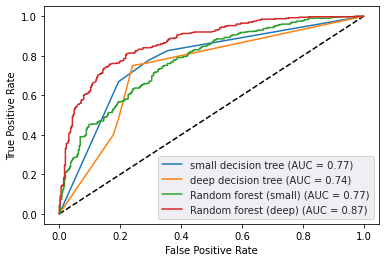

In [10]:
# ROC plot for all the four models trained
ax=plt.gca()
x=np.arange(0,1.1,0.1)
y=x
classic= plt.plot(x,y, '-k', linestyle='dashed')
sns.set_style('darkgrid')
sdt_roc_plot=plot_roc_curve(small_dt, X_test, y_test, ax=ax, label='small decision tree (AUC = 0.77)')
ddt_roc_plot=plot_roc_curve(deep_dt, X_test, y_test, ax=ax, label='deep decision tree (AUC = 0.74)')
srf_roc_plot=plot_roc_curve(small_rf, X_test, y_test, ax=ax,label='Random forest (small) (AUC = 0.77)')
drf_roc_plot=plot_roc_curve(deep_rf, X_test, y_test, ax=ax, label='Random forest (deep) (AUC = 0.87)' )
plt.show()


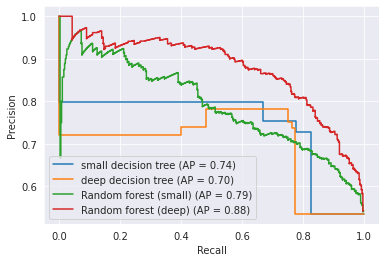

In [11]:
# Precision recall plot for all the four models trained

ax=plt.gca()
sns.set_style('darkgrid')
sdt_prc_plot=plot_precision_recall_curve(small_dt, X_test, y_test, ax=ax, label='small decision tree (AP = 0.74)')
ddt_prc_plot=plot_precision_recall_curve(deep_dt, X_test, y_test, ax=ax, label='deep decision tree (AP = 0.70)')
srf_prc_plot=plot_precision_recall_curve(small_rf, X_test, y_test, ax=ax,label='Random forest (small) (AP = 0.79)')
drf_prc_plot=plot_precision_recall_curve(deep_rf, X_test, y_test, ax=ax , label='Random forest (deep) (AP = 0.88)')
plt.show()


### Training a classifier which avoids type 2 error, by adjusting the decision threshold.

In [12]:
# Training a random forest classifier
clf = RandomForestClassifier(n_jobs=-1, random_state=1)
clf.fit(X_train, y_train.values.ravel())
y_scores=clf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

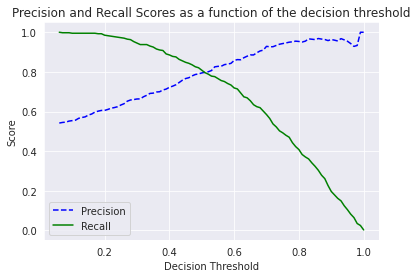

In [13]:
# plotting the recall presision score with respect to decision threshold to find the threshold where the recall is maximum.
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')

To reduce the type 2 error, False negative should be reduced, which can be done by increasing the recall. From the above plot it is clear that recall is greater or near to one for decision threshold less than 0.2.

In [14]:
# Function which changes the predicted classes by adjusting the decision threshold 
def adjusted_classes(y_scores, t=0.5):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]



In [15]:
# adjusting decision threshold value for zero type 2 error (No False negative)
t=0.06
y_pred_adj = adjusted_classes(y_scores, t)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))

     pred_neg  pred_pos
neg         9       340
pos         0       402


From the confusion matrix it is clear that false negative's are zero. Therefore the model avoids type 2 error. 

In [16]:
# metrics for classifier with zero type 2 error.
print('Random forest classifier with zero Type 2 error')
model_metrics('Random forest classifier with zero Type 2 error', y_test, y_pred_adj)

Random forest classifier with zero Type 2 error
Precision for Random forest classifier with zero Type 2 error is 0.5417789757412399
Recall for Random forest classifier with zero Type 2 error is 1.0
Accuracy for Random forest classifier with zero Type 2 error is 0.5472703062583223
F1 score for Random forest classifier with zero Type 2 error is 0.7027972027972028
Log loss for Random forest classifier with zero Type 2 error is 15.63709166097989


##Conclusion
1. From the experiment it can be concluded that, Random forest classifier with deep trees have show better quality among the other classifiers compared.
2. To avoid type 2 error, decision threshold should be reduced. But the accuracy of the model will be effected. 